# Summary

Compare core mutations from Protherm and from the Rosetta ddG benchmarks.

-----

# Imports

In [1]:
%run imports.ipynb

2016-08-28 21:24:41.327557


In [2]:
%run db.ipynb

MySQL database already running...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-08-28 21:24:41.475277


In [3]:
NOTEBOOK_NAME = 'stats'
# os.makedirs(NOTEBOOK_NAME, exist_ok=True)

# Compare

In [45]:
protherm = pd.read_sql_table('protherm', db.engine)

In [62]:
protherm_star = pd.read_sql_table('protherm_star_unique', db.engine)

In [74]:
protherm_star = protherm_star.rename(columns={'AVG(ddg_exp)': 'ddg_exp'})

In [75]:
protherm.shape

(4553, 8)

In [76]:
protherm_star.shape

(3636, 7)

In [77]:
db.engine.

SyntaxError: invalid syntax (<ipython-input-77-266b1457f413>, line 1)

In [78]:
def print_stats(df):
    print2("pdb_id:", 
           df[['pdb_id']].drop_duplicates().shape[0])
    print2("pdb_id / pdb_chain:", 
           df[['pdb_id', 'pdb_chain']].drop_duplicates().shape[0])
    print2("pdb_id / pdb_chain / pdb_mutation:", 
           df[['pdb_id', 'pdb_chain', 'pdb_mutation']].drop_duplicates().shape[0])
    
    print2("uniprot_id:", 
           df[['uniprot_id']].drop_duplicates().shape[0])
    print2("uniprot_id / uniprot_mutation:", 
           df[['uniprot_id', 'uniprot_mutation']].drop_duplicates().shape[0])

    print2("all unique:", df.drop_duplicates().shape[0])
    print2("all:", df.shape[0])

In [79]:
print_stats(protherm)

pdb_id:                                                     171
pdb_id / pdb_chain:                                         198
pdb_id / pdb_chain / pdb_mutation:                          4553
uniprot_id:                                                 161
uniprot_id / uniprot_mutation:                              4489
all unique:                                                 4553
all:                                                        4553


In [80]:
print_stats(protherm_star)

pdb_id:                                                     182
pdb_id / pdb_chain:                                         188
pdb_id / pdb_chain / pdb_mutation:                          3636
uniprot_id:                                                 124
uniprot_id / uniprot_mutation:                              3267
all unique:                                                 3636
all:                                                        3636


In [81]:
db.engine.connect()

In [82]:
df = (
    protherm
    .merge(protherm_star, on=['pdb_id', 'pdb_chain', 'pdb_mutation'], suffixes=('_1', '_2'))
)

In [83]:
df.head()

,idx,pdb_id,pdb_chain,pdb_mutation,uniprot_id_1,uniprot_mutation_1,pfam_id_1,ddg_exp_1,uniprot_id_2,uniprot_mutation_2,pfam_id_2,ddg_exp_2
0,16,1aar,A,A_F45W,P0CH28,F653W,PF00240,-0.600000,P0CH28,F653W,PF00240,-0.460000
1,17,1aar,A,A_H68E,P0CH28,H676E,PF00240,-0.764803,P0CH28,H676E,PF00240,-0.767409
2,18,1aar,A,A_H68Q,P0CH28,H676Q,PF00240,-0.549702,P0CH28,H676Q,PF00240,-0.549857
3,19,1aar,A,A_K27Q,P0CH28,K635Q,PF00240,1.912008,P0CH28,K635Q,PF00240,1.911023
4,20,1aar,A,A_K29N,P0CH28,K637N,PF00240,1.481806,P0CH28,K637N,PF00240,1.576520


In [84]:
df.shape

(2584, 12)

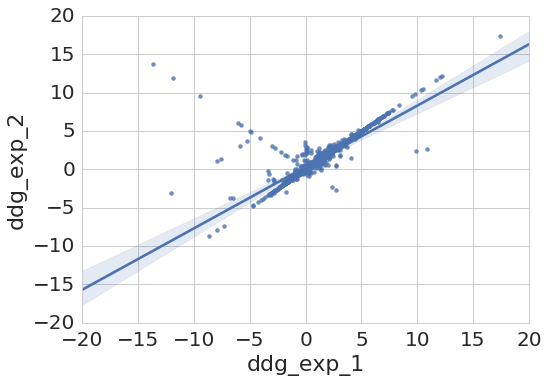

In [85]:
sns.regplot('ddg_exp_1', 'ddg_exp_2', df)